# Ensemble Learning - Random Forest Classifier

# 라이브러리 import

In [2]:
import warnings
# 특정 UserWarning을 무시
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 데이터셋 로드

In [3]:
df = pd.read_csv('수정본.csv')

In [5]:
df.to_csv('수정본.csv')

In [74]:
X = df.drop(columns=['label'])  # 특징 (feature)
y = df['label']   

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print('분류 모델 로드 성공')


분류 모델 로드 성공


In [75]:
test_pred = model.predict(X_test)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, test_pred))
# print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("검증 세트 보고서:\n", classification_report(y_test, test_pred))

검증 세트 정확도: 0.92
검증 세트 보고서:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        34
         1.0       0.83      0.83      0.83         6
         2.0       0.88      0.70      0.78        10

    accuracy                           0.92        50
   macro avg       0.88      0.84      0.86        50
weighted avg       0.92      0.92      0.92        50



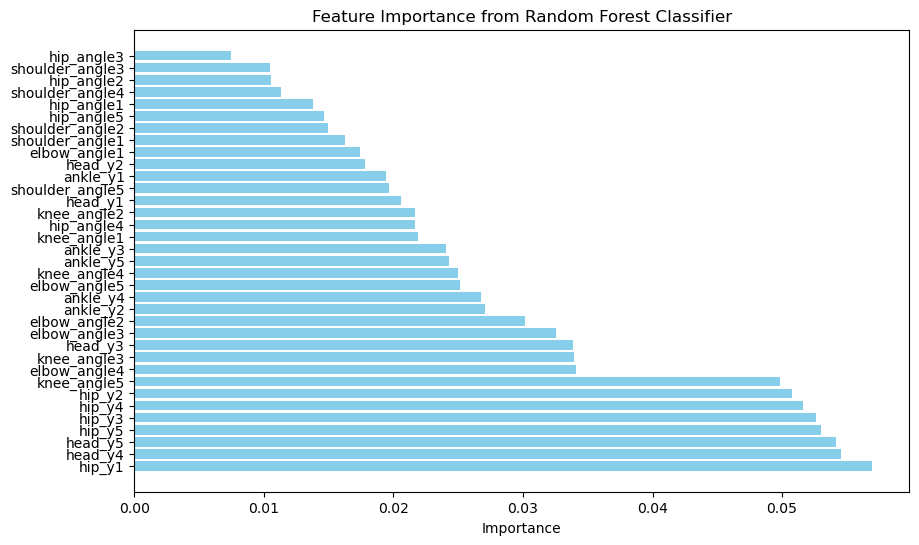

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 가져오기
importances = model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

In [94]:
from imblearn.over_sampling import SMOTE
i=99
while True:
    # 특징 (X)와 라벨 (y) 분리
    X = df.drop(columns=['label'])  # 특징
    y = df['label']  # 라벨

    # 훈련 세트와 테스트 세트로 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    # SMOTE 적용
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # 증식된 데이터로 모델 학습
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # 테스트 세트로 성능 평가
    y_pred = model.predict(X_test)
    if model.score(X_test, y_test) <= 0.92: 
        print('검증 세트 정확도:', model.score(X_test, y_test), i)
        print('검증 세트 보고서:')
        print(classification_report(y_test, y_pred))
        break
    else:
        i += 1

검증 세트 정확도: 0.92 101
검증 세트 보고서:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        34
         1.0       0.83      0.83      0.83         6
         2.0       0.89      0.80      0.84        10

    accuracy                           0.92        50
   macro avg       0.89      0.87      0.88        50
weighted avg       0.92      0.92      0.92        50

